In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import datetime as dat
import matplotlib as plt
import datetime as dt
import xgboost as xgb
%matplotlib inline
sns.set()

In [2]:
features_ventana1 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana1.csv').set_index('ref_hash')
aux_ventana1 = pd.read_csv('../xgb/features_events_gonzalo_ventana1.csv').set_index('ref_hash')
features_ventana1.join(aux_ventana1, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana1 = pd.read_csv('../xgb/features_installs_gonzalo_ventana1.csv').set_index('ref_hash')
features_ventana1.join(aux_ventana1, how = 'outer', rsuffix = '_installs')
aux_ventana1 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana1.csv').set_index('ref_hash')
features_ventana1.join(aux_ventana1, how = 'outer', rsuffix = '_auctions')
features_ventana1.fillna(0)

labels_sc_ventana1 = pd.read_csv('../xgb/labels_sc_ventana1.csv').set_index('device_id')
ventana1 = features_ventana1.join(labels_sc_ventana1, how = 'left').fillna(259200)#3 dias pasado a segundos

In [3]:
features_ventana2 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana2.csv').set_index('ref_hash')
aux_ventana2 = pd.read_csv('../xgb/features_events_gonzalo_ventana2.csv').set_index('ref_hash')
features_ventana2.join(aux_ventana2, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana2 = pd.read_csv('../xgb/features_installs_gonzalo_ventana2.csv').set_index('ref_hash')
features_ventana2.join(aux_ventana2, how = 'outer', rsuffix = '_installs')
aux_ventana2 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana2.csv').set_index('ref_hash')
features_ventana2.join(aux_ventana2, how = 'outer', rsuffix = '_auctions')
features_ventana2.fillna(0)

labels_sc_ventana2 = pd.read_csv('../xgb/labels_sc_ventana2.csv').set_index('device_id')
ventana2 = features_ventana2.join(labels_sc_ventana2, how = 'left').fillna(259200)#3 dias pasado a segundos

In [4]:
features_ventana3 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana3.csv').set_index('ref_hash')
aux_ventana3 = pd.read_csv('../xgb/features_events_gonzalo_ventana3.csv').set_index('ref_hash')
features_ventana3.join(aux_ventana3, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana3 = pd.read_csv('../xgb/features_installs_gonzalo_ventana3.csv').set_index('ref_hash')
features_ventana3.join(aux_ventana3, how = 'outer', rsuffix = '_installs')
aux_ventana3 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana3.csv').set_index('ref_hash')
features_ventana3.join(aux_ventana3, how = 'outer', rsuffix = '_auctions')
aux_ventana4 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana4.csv').set_index('ref_hash')
features_ventana4.join(aux_ventana4, how = 'outer', rsuffix = '_auctions')
features_ventana3.fillna(0)

labels_sc_ventana3 = pd.read_csv('../xgb/labels_sc_ventana3.csv').set_index('device_id')
ventana3 = features_ventana3.join(labels_sc_ventana3, how = 'left').fillna(259200)#3 dias pasado a segundos

In [5]:
features_ventana4 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana4.csv').set_index('ref_hash')
aux_ventana4 = pd.read_csv('../xgb/features_events_gonzalo_ventana4.csv').set_index('ref_hash')
features_ventana4.join(aux_ventana4, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana4 = pd.read_csv('../xgb/features_installs_gonzalo_ventana4.csv').set_index('ref_hash')
features_ventana4.join(aux_ventana4, how = 'outer', rsuffix = '_installs')
features_ventana4.fillna(0)

labels_sc_ventana4 = pd.read_csv('../xgb/labels_sc_ventana4.csv').set_index('device_id')
ventana4 = features_ventana4.join(labels_sc_ventana4, how = 'left').fillna(259200)#3 dias pasado a segundos

In [6]:
matriz = ventana1.append(ventana2).append(ventana3).append(ventana4).reset_index('ref_hash')
filas = matriz.shape[0]
matriz.head(5)

,ref_hash,latitude_sum,latitude_mean,latitude_std,latitude_min,latitude_max,longitude_sum,longitude_mean,longitude_std,longitude_min,...,time_categ1 a 3 min_std,time_categ1 a 3 min_min,time_categ1 a 3 min_max,time_categ3 a 10min_sum,time_categ3 a 10min_mean,time_categ3 a 10min_std,time_categ3 a 10min_min,time_categ3 a 10min_max,Unnamed: 0,tiempo_hasta_aparicion
0,1461247282174365,1.716947,1.716947,0.0,1.716947,1.716947,0.871203,0.871203,0.0,0.871203,...,0.0,0,0,1,1.0,0.0,1,1,231680.0,259200.000000
1,5470466329076030,1.873294,1.873294,0.0,1.873294,1.873294,0.844857,0.844857,0.0,0.844857,...,0.0,0,0,0,0.0,0.0,0,0,125282.0,17850.727626
2,5534899846690585,1.816352,1.816352,0.0,1.816352,1.816352,0.833068,0.833068,0.0,0.833068,...,0.0,0,0,0,0.0,0.0,0,0,86728.0,23766.251362
3,7429113196145773,1.792518,1.792518,0.0,1.792518,1.792518,0.866689,0.866689,0.0,0.866689,...,0.0,0,0,0,0.0,0.0,0,0,158206.0,13825.152641
4,8577232270715133,1.712736,1.712736,0.0,1.712736,1.712736,0.869157,0.869157,0.0,0.869157,...,0.0,0,0,0,0.0,0.0,0,0,70494.0,14322.143202


In [7]:
features = matriz.iloc[:,:-1]
labels = matriz.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=features,label=labels)

/usr/local/lib/python2.7/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python2.7/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [8]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

## Información de los resultados

In [14]:
cv_results.head()

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,114817.950781,1755.870834,114788.521094,184.141774
1,110675.627344,1958.988896,110600.290625,515.856899
2,107139.462500,1983.204381,107030.919531,749.578399
3,103817.789843,2200.720044,103650.713281,1224.536963
4,101332.395312,2331.959855,101109.751562,1484.652454


## Error final

In [15]:
print((cv_results["test-rmse-mean"]).tail(1))

49    79795.209375
Name: test-rmse-mean, dtype: float64


## Visualizando los árboles

In [16]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

## Importancia de los features (cuantas veces aparecen en los árboles)

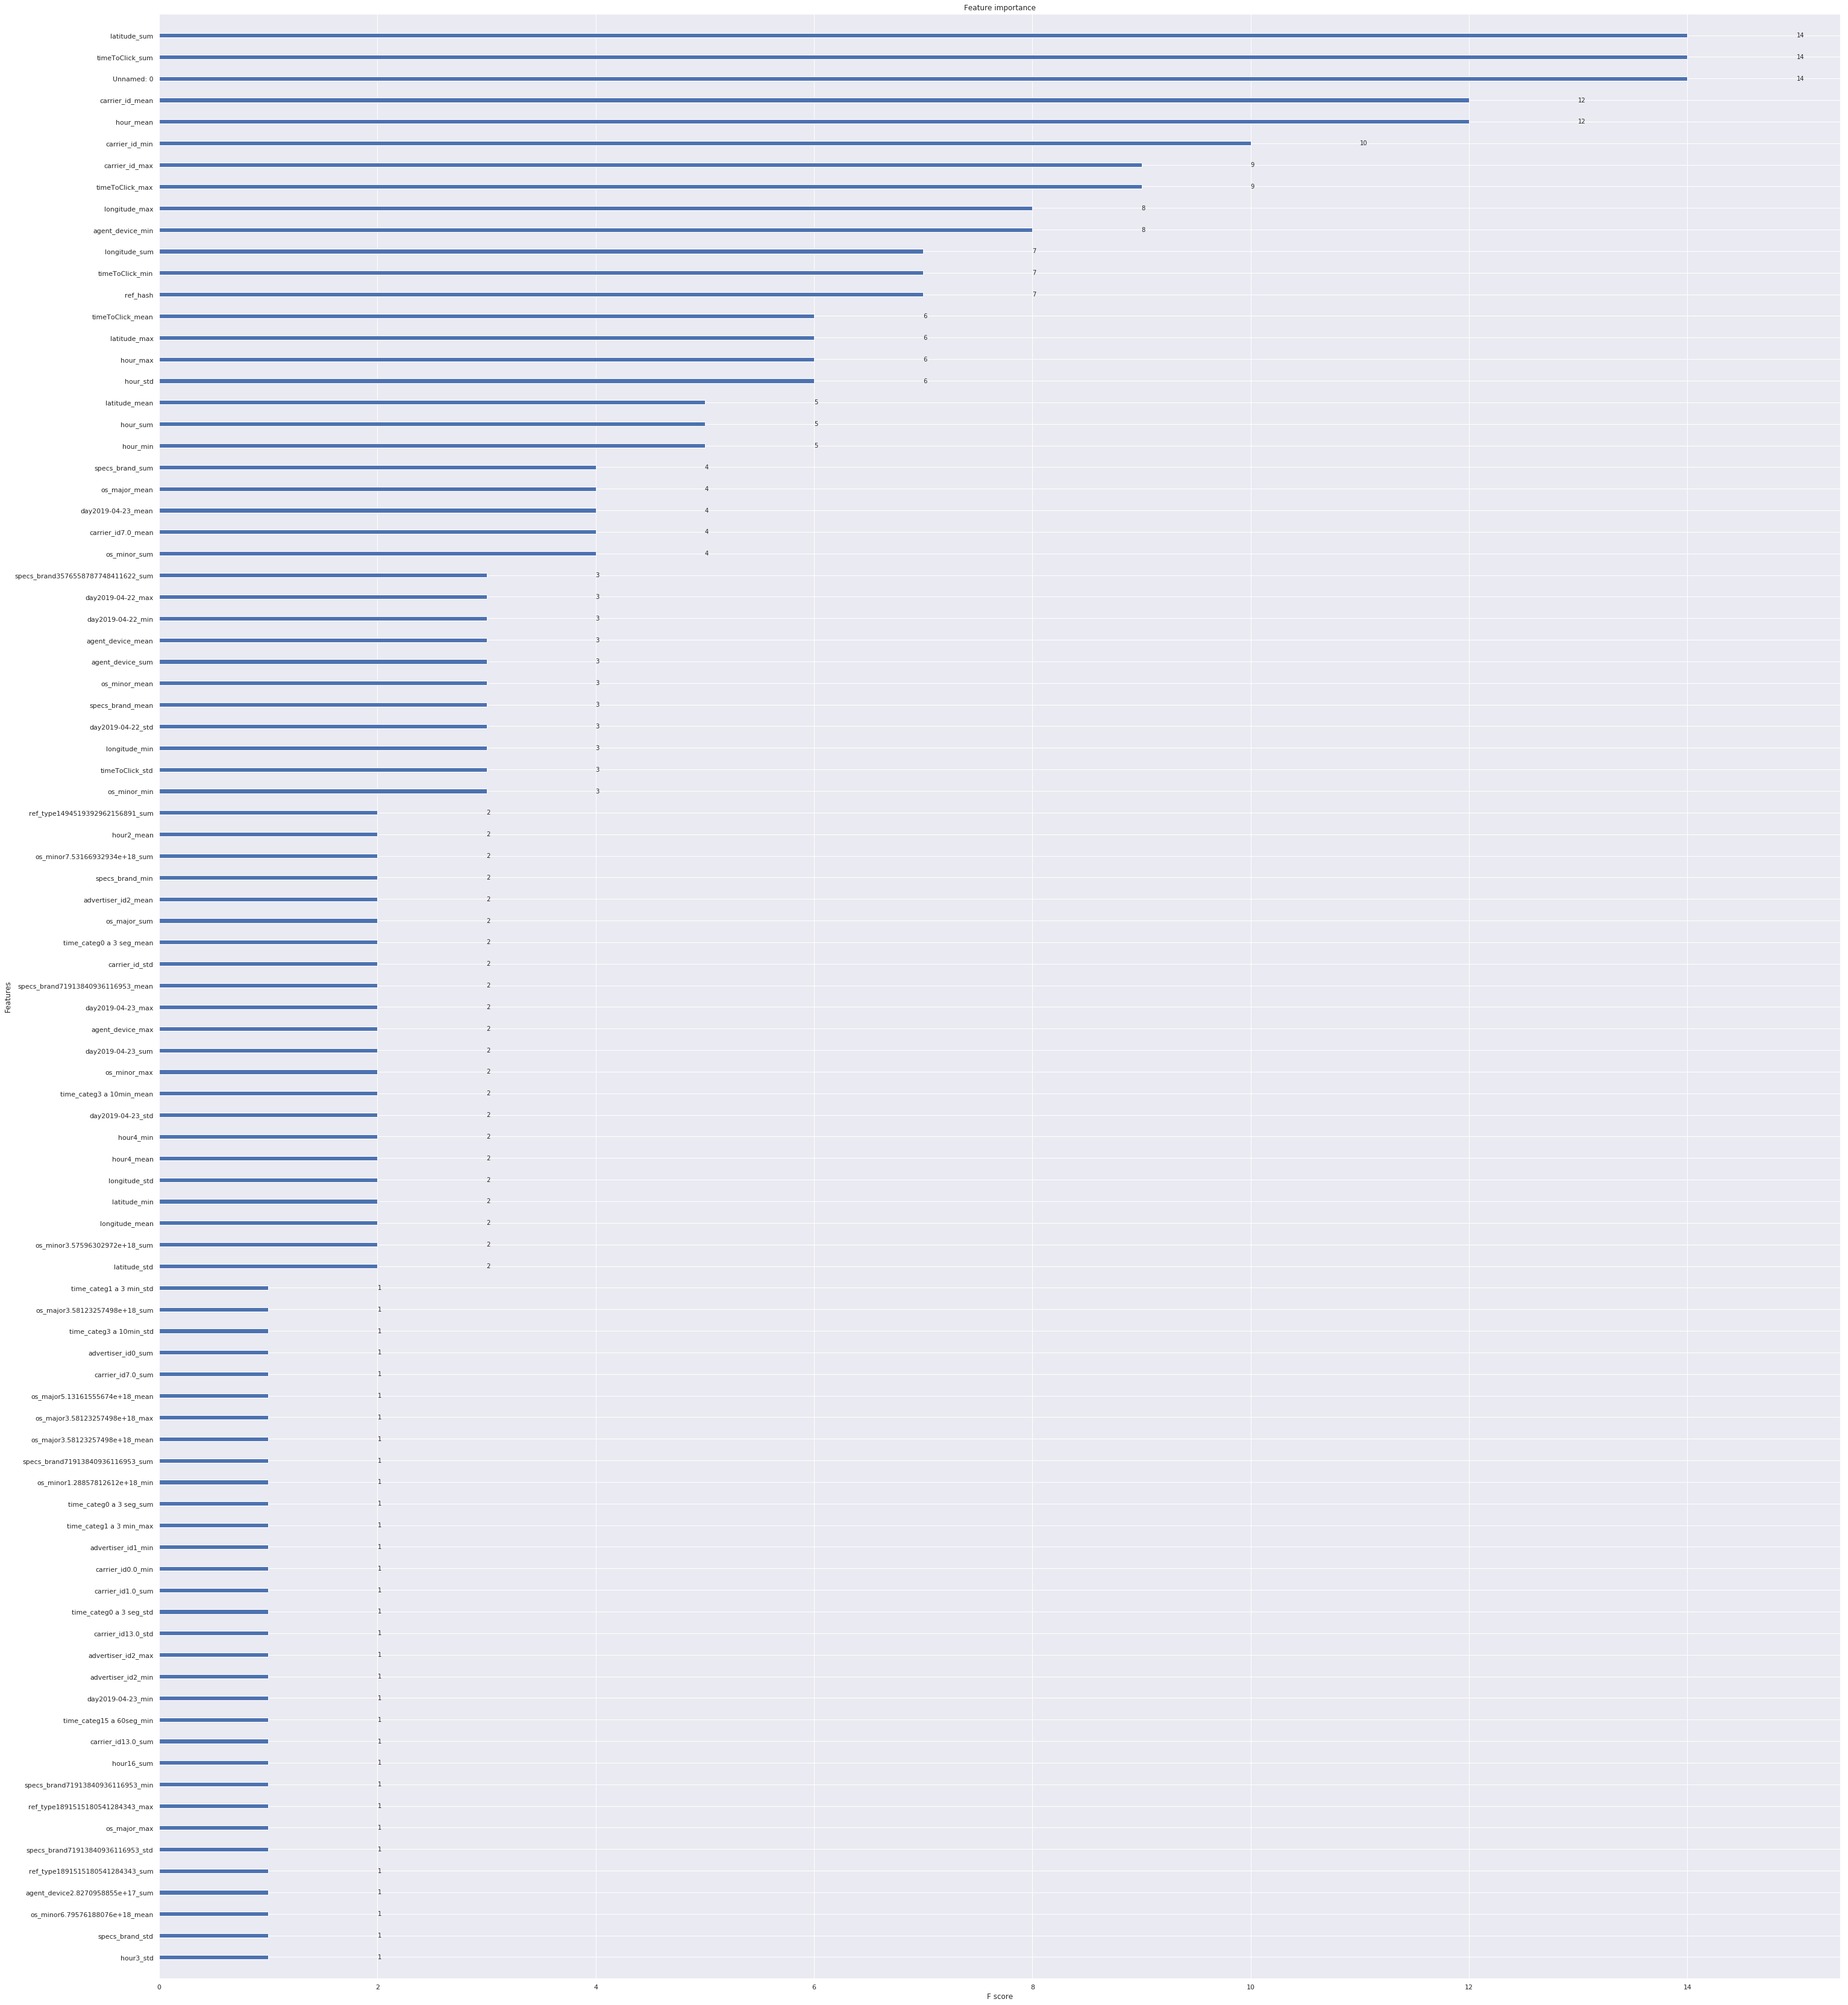

In [18]:
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [50, 60]
plt.show()

In [4]:
features_ventana7 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana7.csv').set_index('ref_hash')
aux_ventana7 = pd.read_csv('../xgb/features_events_gonzalo_ventana7.csv').set_index('ref_hash')
features_ventana7.join(aux_ventana7, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana7 = pd.read_csv('../xgb/features_installs_gonzalo_ventana7.csv').set_index('ref_hash')
features_ventana7.join(aux_ventana7, how = 'outer', rsuffix = '_installs')
aux_ventana7 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana7.csv').set_index('ref_hash')
features_ventana7.join(aux_ventana7, how = 'outer', rsuffix = '_auctions')
features_ventana7.fillna(0)

In [ ]:
predicted_labels = xg_reg.predict(features_ventana7)